In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv


Name : Samuel Terry 
ID : 1522492

In [2]:

data = pd.read_csv('/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv')
data.head()


,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


This is the table of data.

In [3]:

new_data = data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id           683 non-null int64
thickness    683 non-null int64
size         683 non-null int64
shape        683 non-null int64
adhesion     683 non-null int64
single       683 non-null int64
nuclei       683 non-null float64
chromatin    683 non-null int64
nucleoli     683 non-null int64
mitosis      683 non-null int64
class        683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


Delete data sets with null nuclei data field.

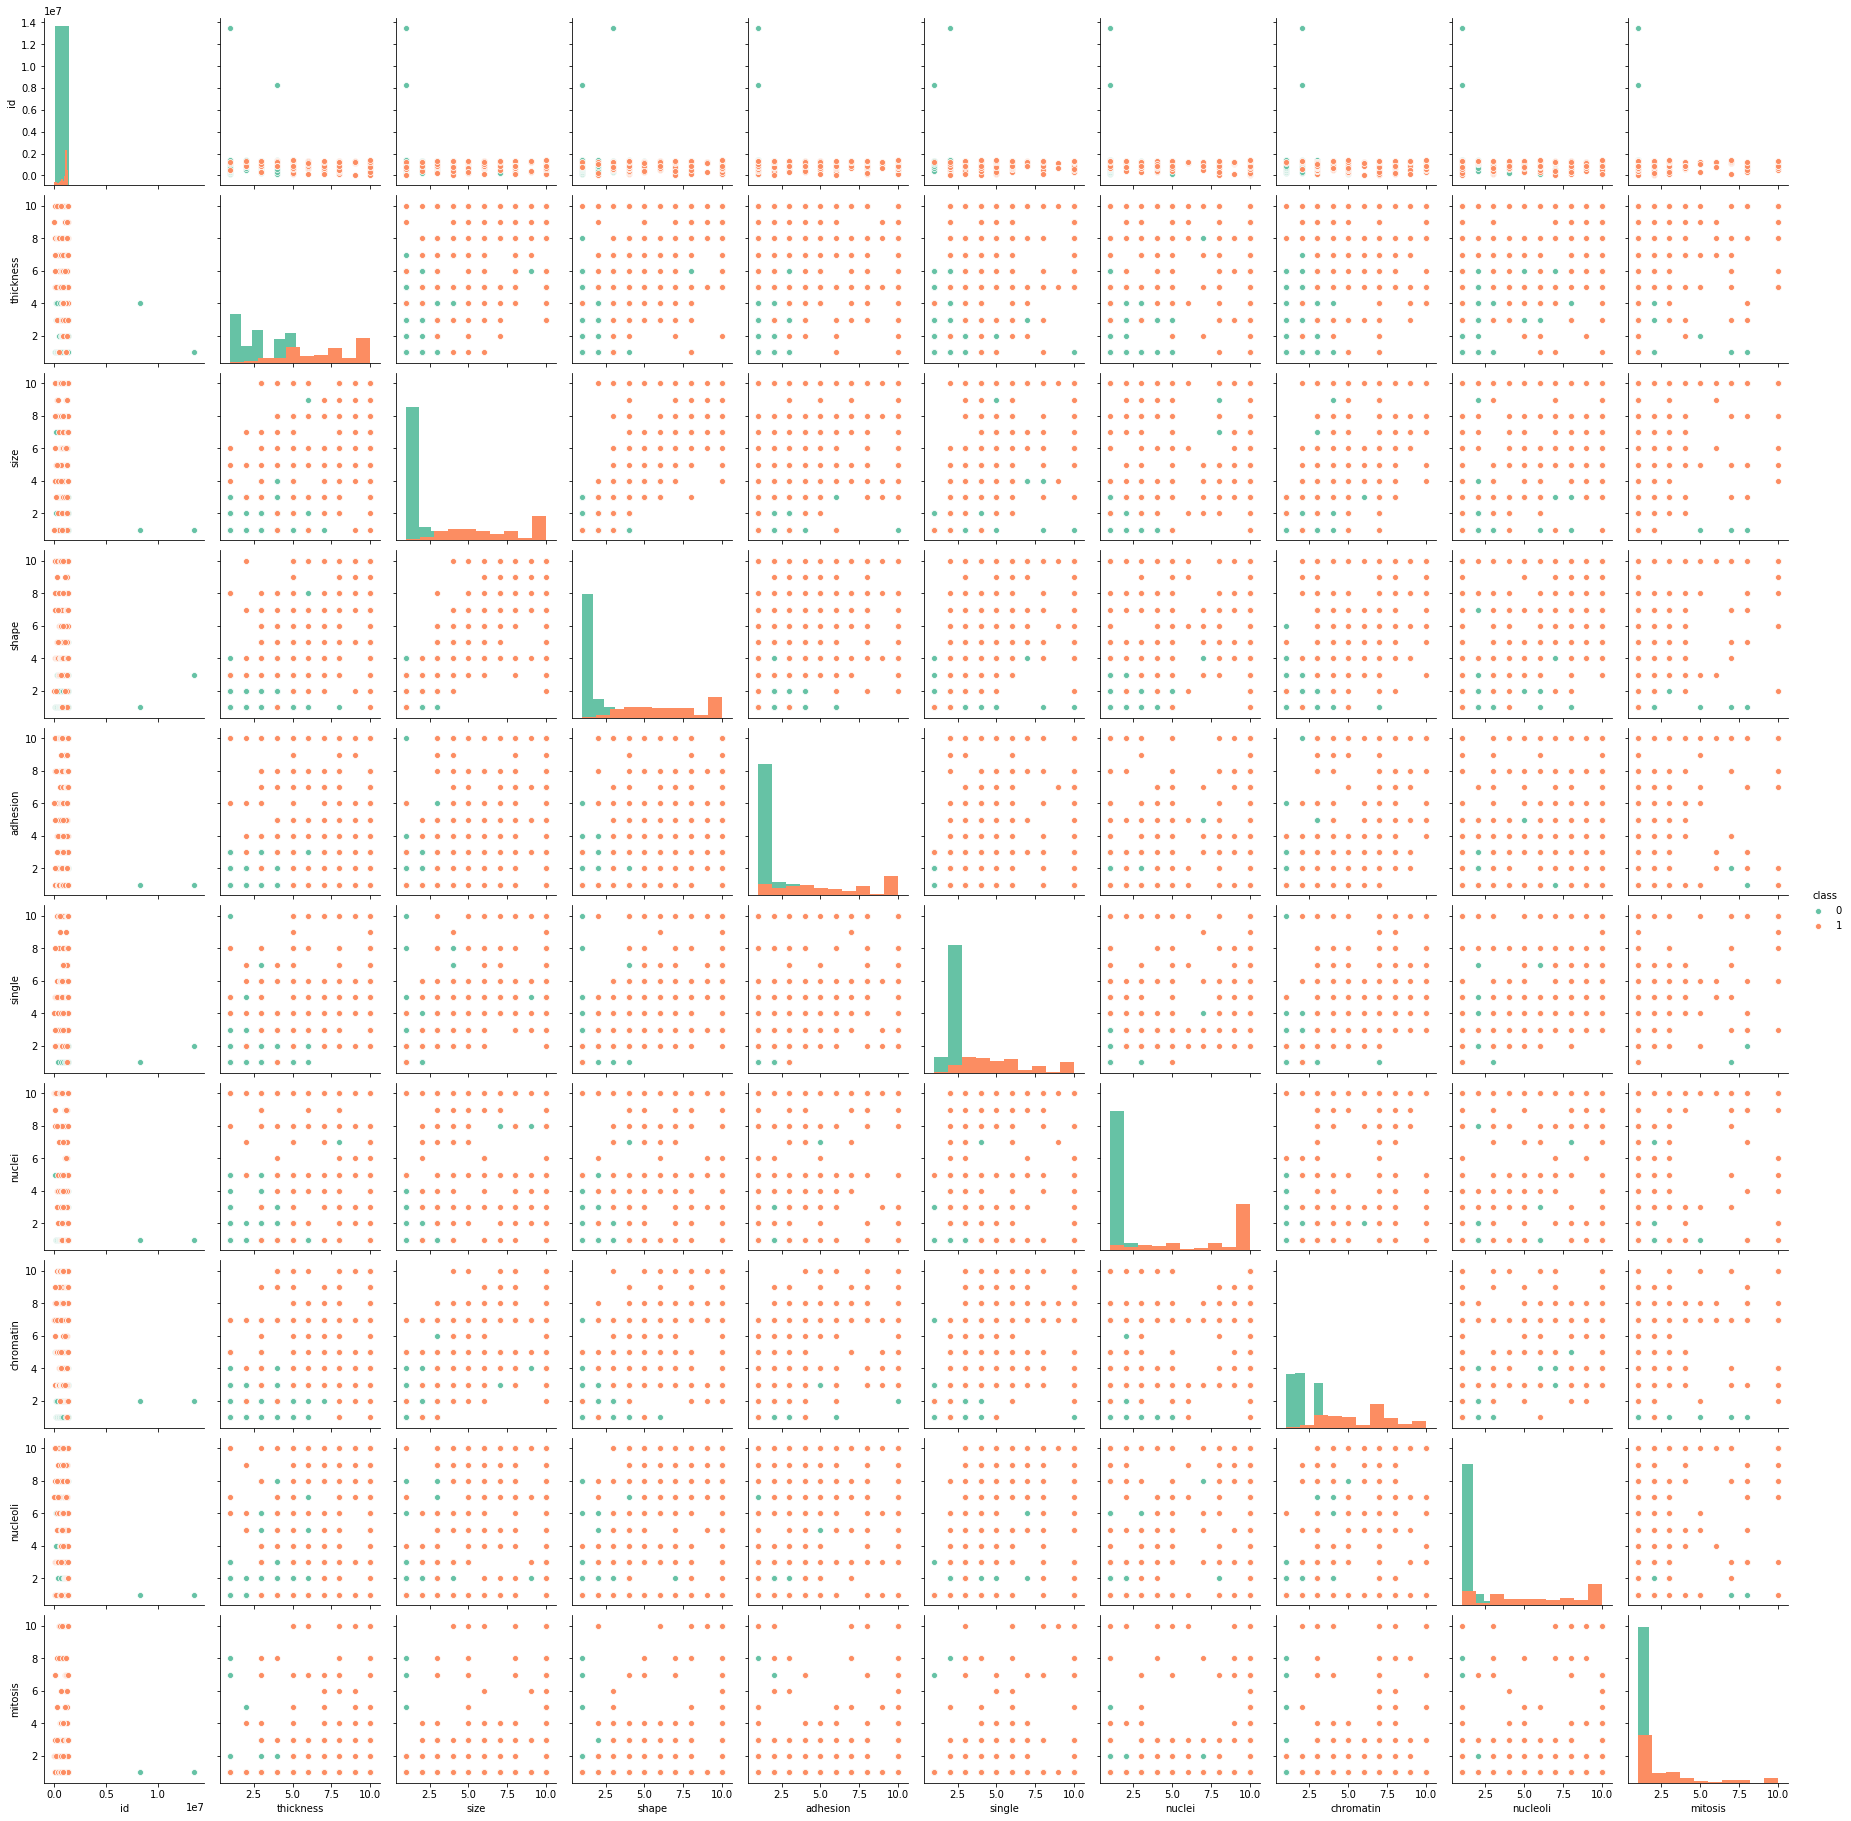

In [4]:
import seaborn as sns
sns.pairplot(data=new_data, hue="class", palette="Set2" ,diag_kind="hist")

In [5]:
X = new_data.iloc[0:683 , 1:10]
print(X)


     thickness  size  shape  adhesion  single  nuclei  chromatin  nucleoli  \
0            5     1      1         1       2     1.0          3         1   
1            5     4      4         5       7    10.0          3         2   
2            3     1      1         1       2     2.0          3         1   
3            6     8      8         1       3     4.0          3         7   
4            4     1      1         3       2     1.0          3         1   
..         ...   ...    ...       ...     ...     ...        ...       ...   
694          3     1      1         1       3     2.0          1         1   
695          2     1      1         1       2     1.0          1         1   
696          5    10     10         3       7     3.0          8        10   
697          4     8      6         4       3     4.0         10         6   
698          4     8      8         5       4     5.0         10         4   

     mitosis  
0          1  
1          1  
2          1  
3  

Everything other than class is on our X- Axis

In [6]:
y = new_data.iloc[0:683 , 10:11]
print(y)

     class
0        0
1        0
2        0
3        0
4        0
..     ...
694      0
695      0
696      1
697      1
698      1

[683 rows x 1 columns]


Class is our Y -axis

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1522492)

Seperates X and Y, input and output and the test and train set.

In [8]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)


pred = model.predict(X_test)
print(pred[0:10])
print(y_test[0:10])

[0 0 1 1 0 1 1 0 0 0]
     class
695      0
566      0
467      1
215      1
277      0
340      1
357      1
116      0
567      0
579      0


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predict test data.

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[79  1]
 [ 1 56]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.98      0.98      0.98        57

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

